In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:

data.drop('customerID',axis=1,inplace=True)
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data = data.dropna()
unique_elements = data.apply(pd.Series.unique)
print(unique_elements)

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract            

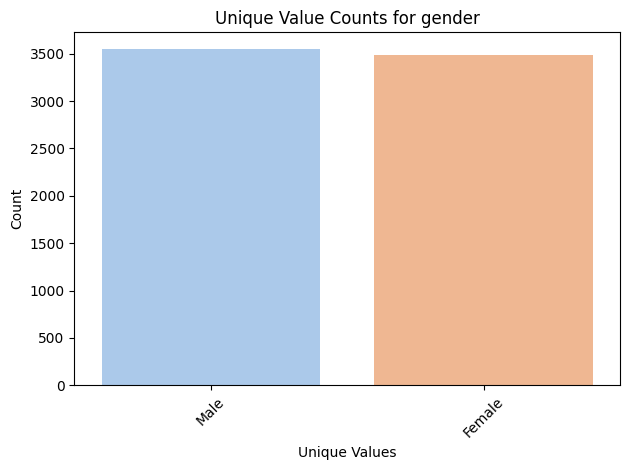

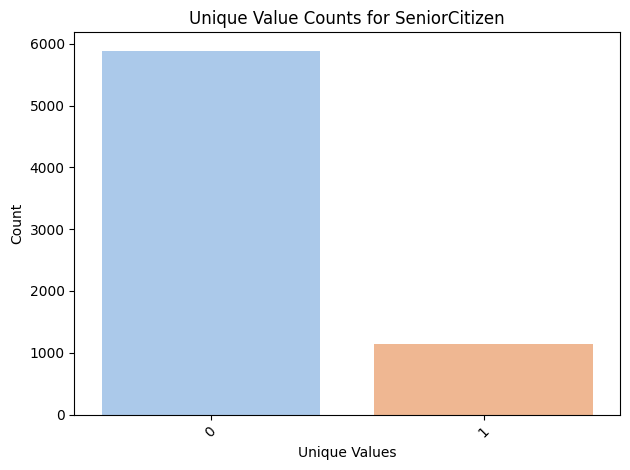

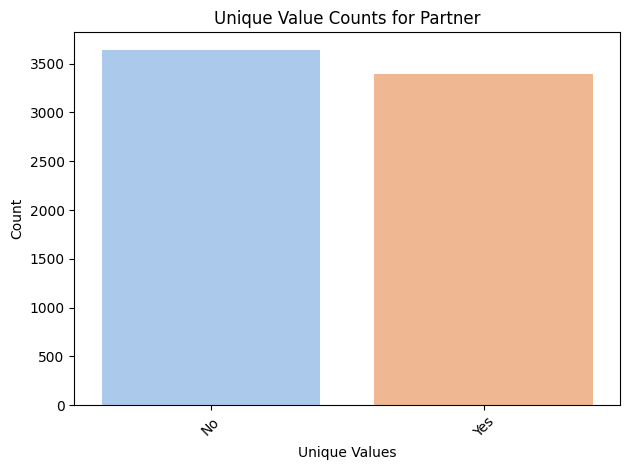

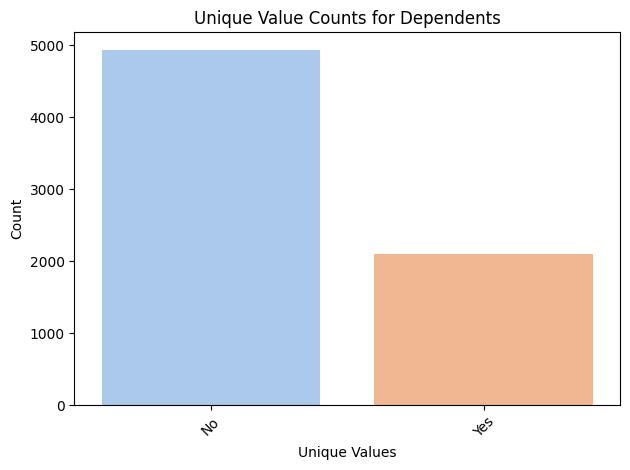

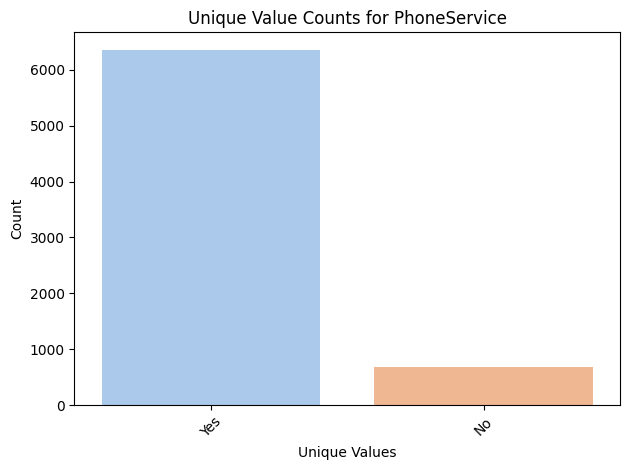

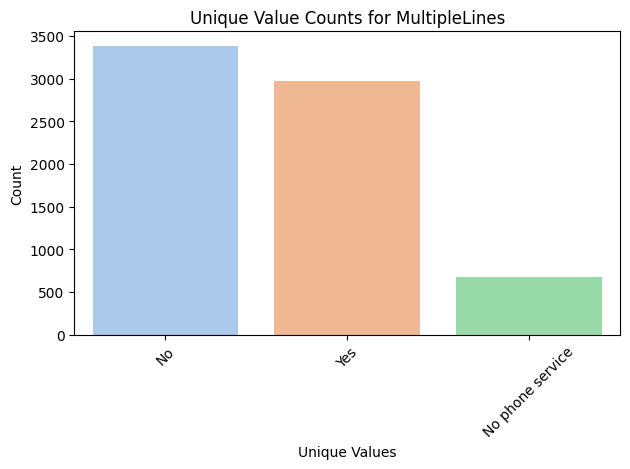

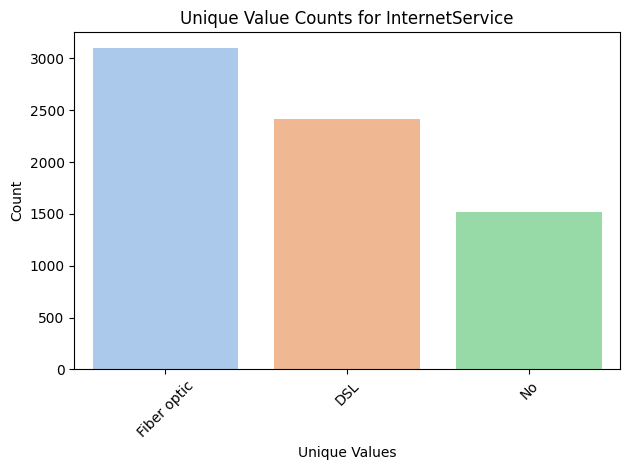

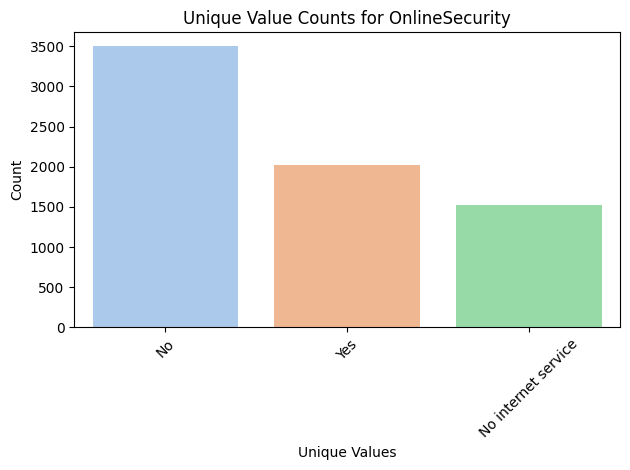

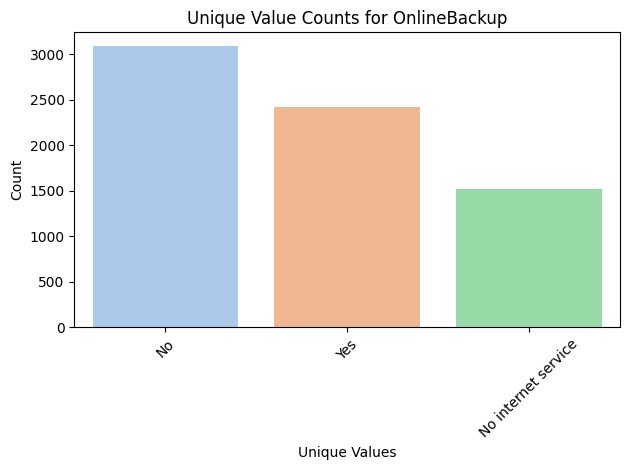

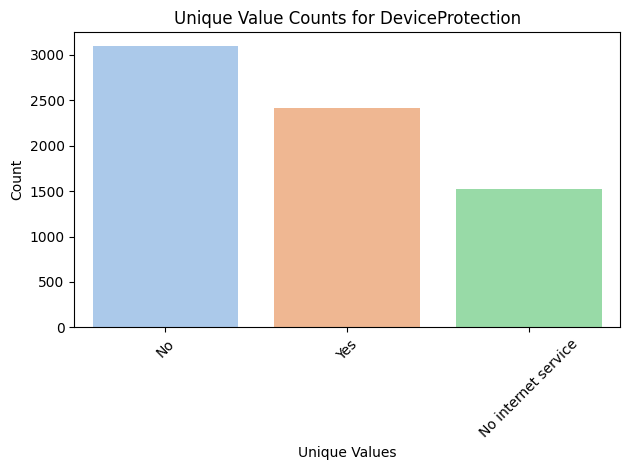

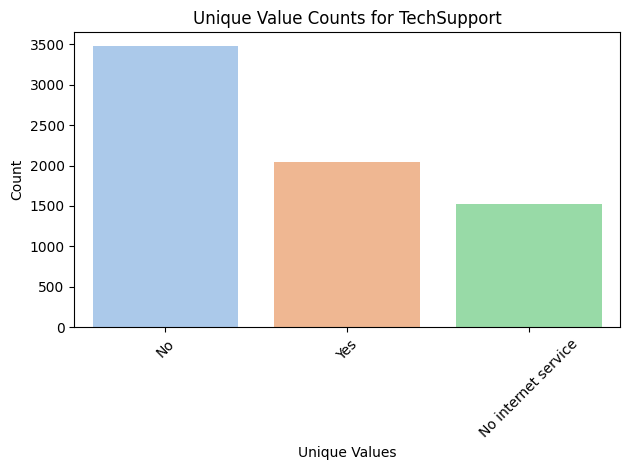

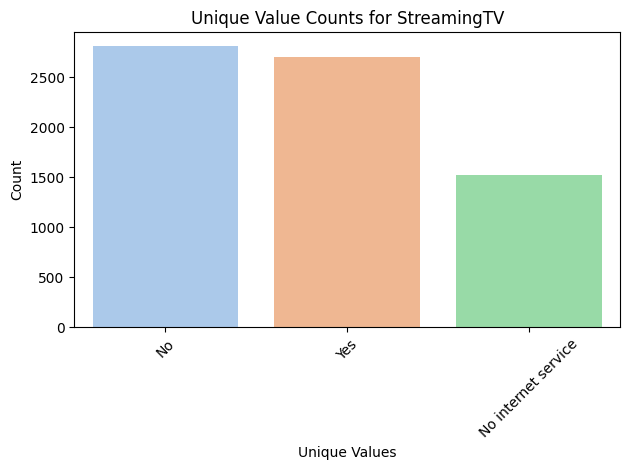

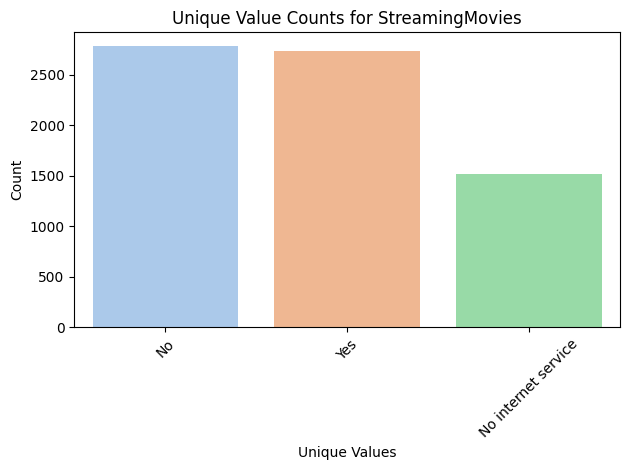

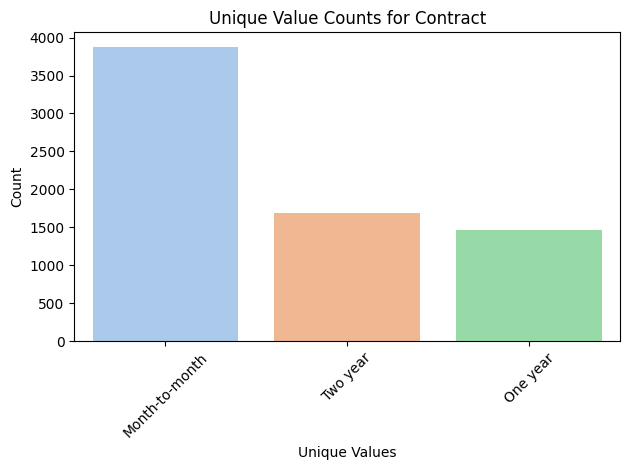

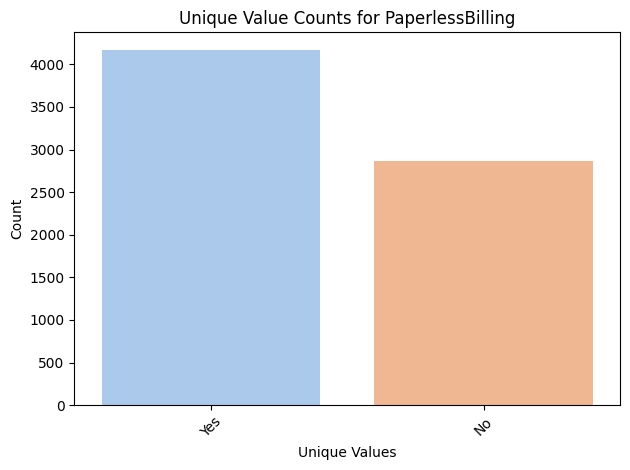

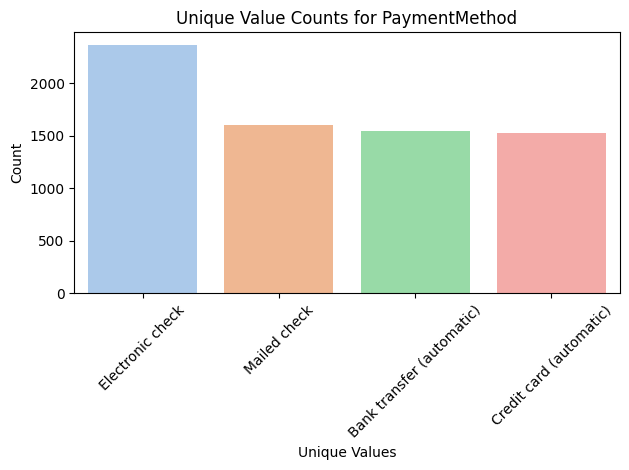

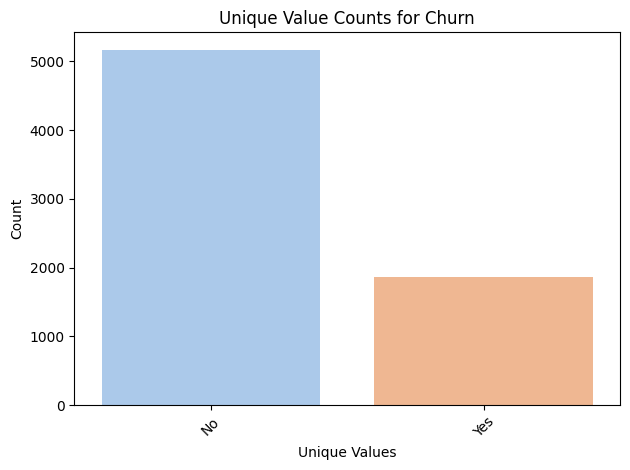

In [ ]:


df = pd.DataFrame(data)

# Columns to exclude
exclude_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in exclude_cols:
        value_counts = df[col].value_counts()
        value_counts_df = value_counts.reset_index()
        value_counts_df.columns = [col, "Count"]

        sns.barplot(x=col, y="Count", data=value_counts_df, palette="pastel")
        plt.title(f"Unique Value Counts for {col}")
        plt.xlabel("Unique Values")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [ ]:

categorical_cols = data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix['Churn'].sort_values(ascending=False))

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64


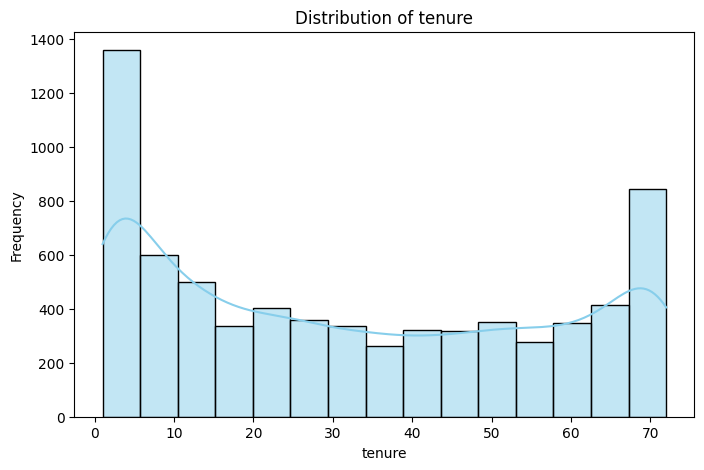

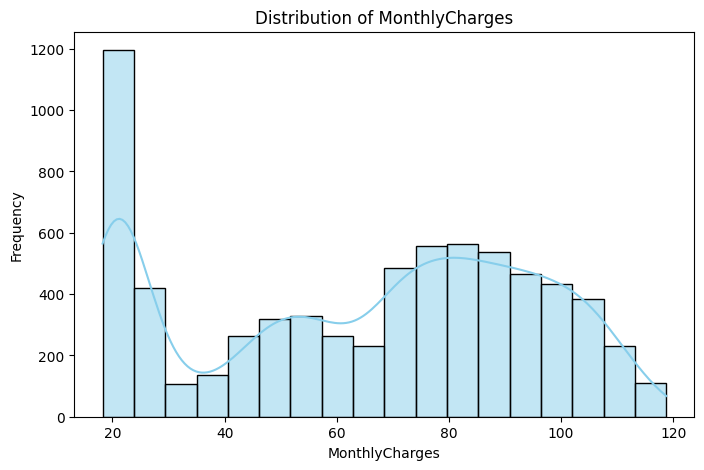

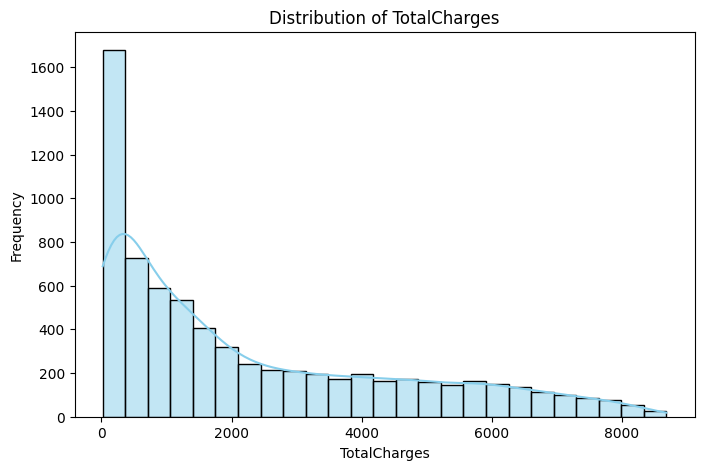

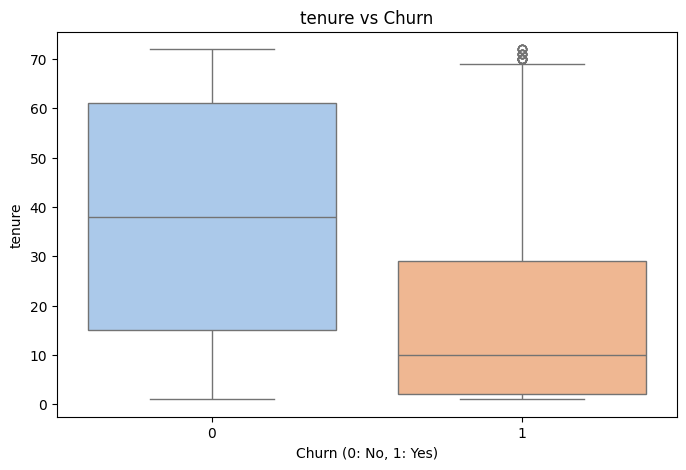

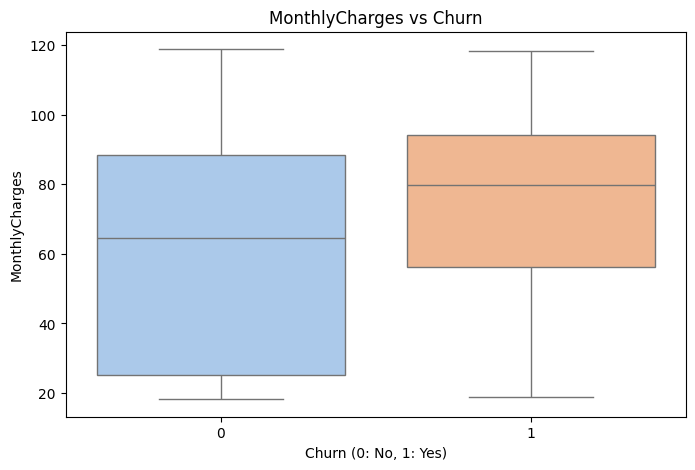

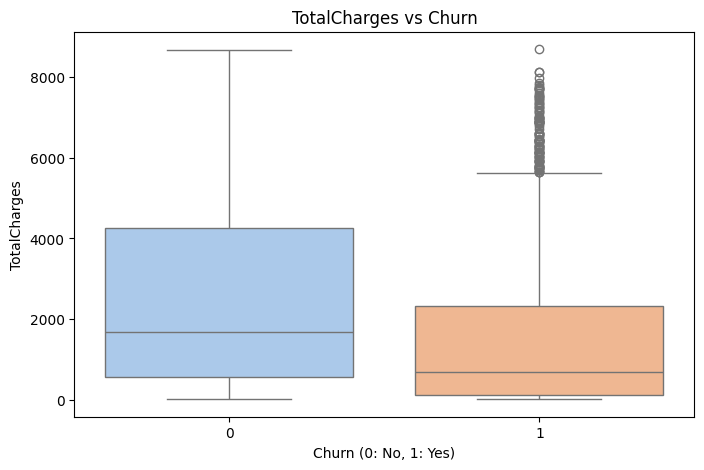

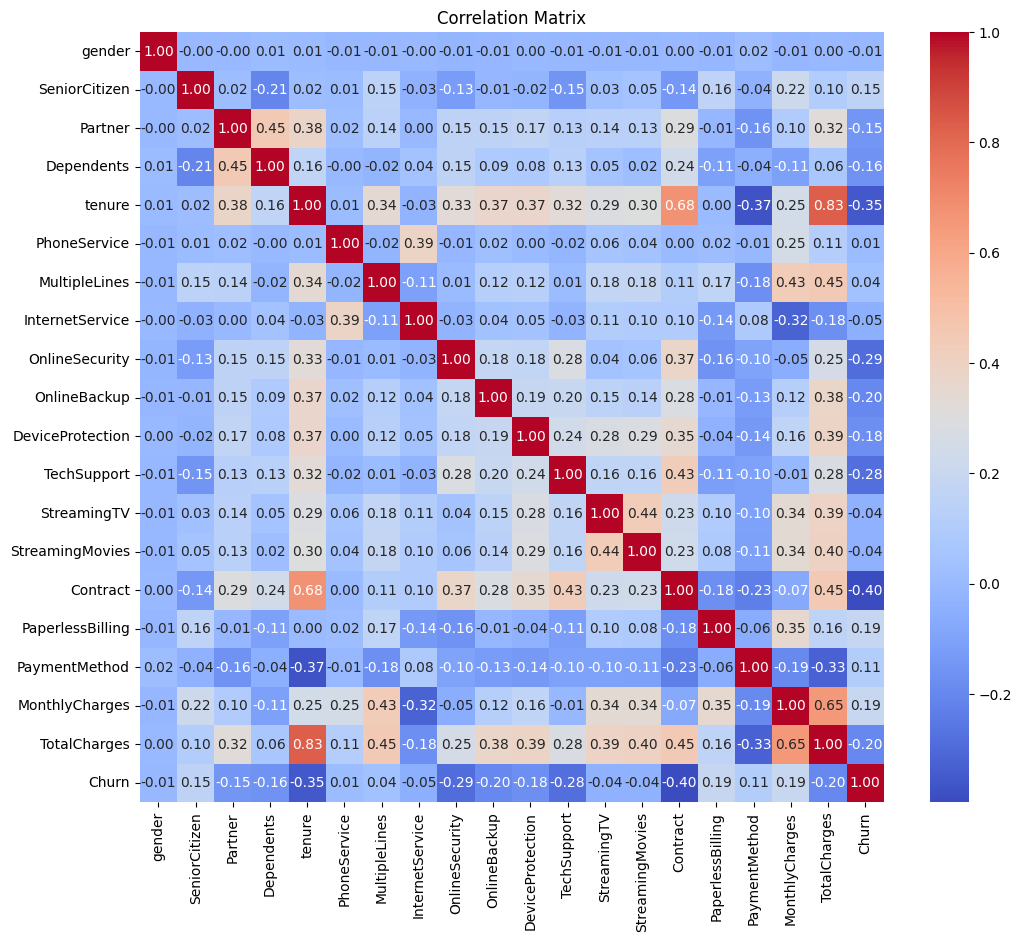

In [ ]:

# Distribution plots for numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical columns vs Churn
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=col, data=data, palette='pastel')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Key Insight from TotalCharges vs Churn:**


1.   Churned customers (class 1) generally have lower TotalCharges compared to non-churned customers.
2.   Non-churned customers have a wider spread and higher median TotalCharges, indicating they tend to accumulate more charges, possibly due to longer tenure or higher monthly charges.

1.   The presence of outliers in both groups suggests some customers (both churned and non-churned) have exceptionally high TotalCharges.












In [ ]:

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

             Feature  Importance
18      TotalCharges    0.184953
17    MonthlyCharges    0.178014
4             tenure    0.154510
14          Contract    0.080585
16     PaymentMethod    0.052031
8     OnlineSecurity    0.048509
11       TechSupport    0.047581
7    InternetService    0.026813
0             gender    0.026715
9       OnlineBackup    0.025883
15  PaperlessBilling    0.025652
2            Partner    0.023329
6      MultipleLines    0.022613
10  DeviceProtection    0.021107
1      SeniorCitizen    0.020989
3         Dependents    0.019778
12       StreamingTV    0.017974
13   StreamingMovies    0.017569
5       PhoneService    0.005397


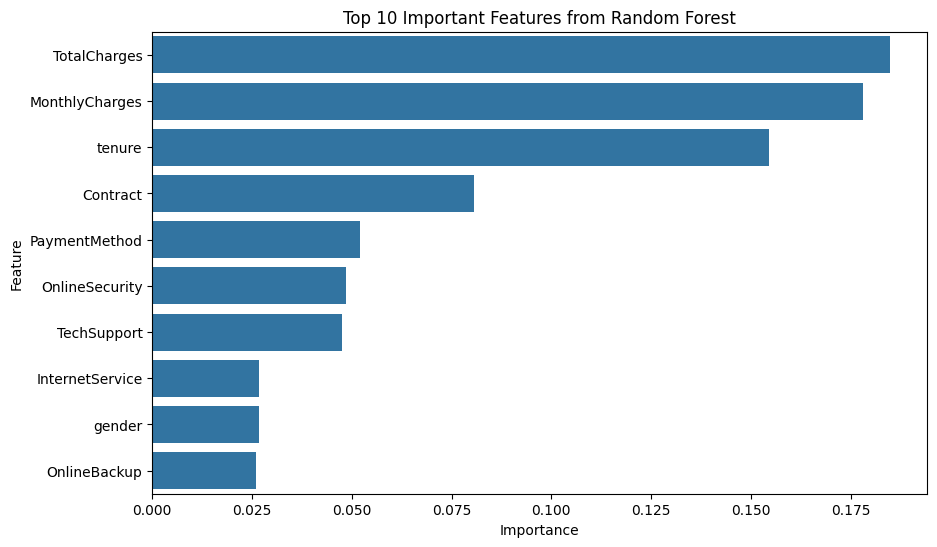

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Important Features from Random Forest")
plt.show()


In [ ]:

important_features = feature_importance_df[feature_importance_df['Importance'] >= 0.01]['Feature'].tolist()
important_features = feature_importance_df.head(10)['Feature'].tolist()
X_reduced = X[important_features]
df_reduced = data[important_features + ['Churn']]
df_reduced

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,InternetService,gender,OnlineBackup,Churn
0,29.85,29.85,1,0,2,0,0,0,0,2,0
1,1889.50,56.95,34,1,3,2,0,0,1,0,0
2,108.15,53.85,2,0,3,2,0,0,1,2,1
3,1840.75,42.30,45,1,0,2,2,0,1,0,0
4,151.65,70.70,2,0,2,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,3,2,2,0,1,0,0
7039,7362.90,103.20,72,1,1,0,0,1,0,2,0
7040,346.45,29.60,11,0,2,2,0,0,0,0,0
7041,306.60,74.40,4,0,3,0,0,1,1,0,1


In [ ]:
X = df_reduced.drop('Churn', axis=1)
y = df_reduced['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X.isnull().sum())  # To check for missing values in each feature of X


TotalCharges       0
MonthlyCharges     0
tenure             0
Contract           0
PaymentMethod      0
OnlineSecurity     0
TechSupport        0
InternetService    0
gender             0
OnlineBackup       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Decide which models need scaled input
scaled_models = ["Logistic Regression", "SVM", "Naive Bayes"]

# Loop through models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

for name, model in models.items():
    # Choose input features
    X_features = X_scaled if name in scaled_models else X

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_features, y, test_size=0.2, stratify=y, random_state=42
    )

    # Train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Probabilities (for ROC-AUC)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred  # fallback for models like SVM if probability=False

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Output
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"Precision for class 0: {precision[0]:.4f}, class 1: {precision[1]:.4f}")
    print(f"Recall for class 0: {recall[0]:.4f}, class 1: {recall[1]:.4f}")
    print(f"F1-score for class 0: {f1[0]:.4f}, class 1: {f1[1]:.4f}")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print("-" * 50)


Logistic Regression: Accuracy = 0.7775
Precision for class 0: 0.8333, class 1: 0.5933
Recall for class 0: 0.8712, class 1: 0.5187
F1-score for class 0: 0.8519, class 1: 0.5535
AUC-ROC Score: 0.8260
--------------------------------------------------
Random Forest: Accuracy = 0.7719
Precision for class 0: 0.8219, class 1: 0.5880
Recall for class 0: 0.8800, class 1: 0.4733
F1-score for class 0: 0.8499, class 1: 0.5244
AUC-ROC Score: 0.7966
--------------------------------------------------
XGBoost: Accuracy = 0.7598
Precision for class 0: 0.8269, class 1: 0.5523
Recall for class 0: 0.8509, class 1: 0.5080
F1-score for class 0: 0.8387, class 1: 0.5292
AUC-ROC Score: 0.8090
--------------------------------------------------
SVM: Accuracy = 0.7818
Precision for class 0: 0.8276, class 1: 0.6120
Recall for class 0: 0.8877, class 1: 0.4893
F1-score for class 0: 0.8566, class 1: 0.5438
AUC-ROC Score: 0.7867
--------------------------------------------------
Naive Bayes: Accuracy = 0.7349
Precisi

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Split data (adjust X_input accordingly below)
scaled_models = ["Logistic Regression", "SVM", "Naive Bayes"]

# Define hyperparameter grids
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'class_weight': ['balanced']
}

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'class_weight': ['balanced']
}

param_grid_nb = {}  # Naive Bayes doesn’t have many tunable params

# Define models with grids and input source
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), param_grid_lr, X_scaled),
    "Random Forest": (RandomForestClassifier(), param_grid_rf, X),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, X),
    "SVM": (SVC(probability=True), param_grid_svm, X_scaled),
    "Naive Bayes": (GaussianNB(), param_grid_nb, X_scaled)
}

# Iterate over models
for name, (model, param_grid, X_input) in models.items():
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X_input, y, test_size=0.2, stratify=y, random_state=42
    )

    # Apply GridSearchCV if param_grid is provided
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        best_model = model
        best_model.fit(X_train, y_train)

    # Predictions
    y_pred = best_model.predict(X_test)
    if hasattr(best_model, "predict_proba"):
        y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = y_pred  # fallback if no proba

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Print results
    print(f"\n{name}:")
    if param_grid:
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1 Score from GridSearch (CV): {grid_search.best_score_:.4f}")
    print(f"Test Accuracy = {accuracy:.4f}")
    print(f"Precision for class 0: {precision[0]:.4f}, class 1: {precision[1]:.4f}")
    print(f"Recall for class 0: {recall[0]:.4f}, class 1: {recall[1]:.4f}")
    print(f"F1-score for class 0: {f1[0]:.4f}, class 1: {f1[1]:.4f}")
    print(f"AUC-ROC Score: {auc_roc:.4f}")
    print("-" * 50)



Logistic Regression:
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score from GridSearch (CV): 0.6168
Test Accuracy = 0.7249
Precision for class 0: 0.9027, class 1: 0.4893
Recall for class 0: 0.7009, class 1: 0.7914
F1-score for class 0: 0.7891, class 1: 0.6047
AUC-ROC Score: 0.8251
--------------------------------------------------

Random Forest:
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best F1 Score from GridSearch (CV): 0.6287
Test Accuracy = 0.7584
Precision for class 0: 0.8854, class 1: 0.5335
Recall for class 0: 0.7706, class 1: 0.7246
F1-score for class 0: 0.8240, class 1: 0.6145
AUC-ROC Score: 0.8273
--------------------------------------------------

XGBoost:
Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
Best F1 Score from GridSearch (CV): 0.5791
Test Accuracy = 0.7825
Precision for class 0: 0.8363, class 1: 0.6043
Recall for cl

In [ ]:
from sklearn.ensemble import VotingClassifier

# Use the best models from previous GridSearchCV
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=1, class_weight='balanced', solver='lbfgs', penalty='l2', max_iter=1000)),
        ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced')),
        ('xgb', XGBClassifier(n_estimators=50, learning_rate=0.3, max_depth=3, use_label_encoder=False, eval_metric='logloss')),
        ('svm', SVC(C=10, kernel='poly', class_weight='balanced', probability=True)),
        ('nb', GaussianNB())
    ],
    voting='soft'  # or 'hard'
)

# Train-test split
X_final = X_scaled  # assuming scaled version generalizes best
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, stratify=y, random_state=42)

# Fit and predict
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
auc_roc = roc_auc_score(y_test, y_proba)

print("\nVoting Classifier (Soft Voting):")
print(f"Accuracy = {accuracy:.4f}")
print(f"Precision for class 0: {precision[0]:.4f}, class 1: {precision[1]:.4f}")
print(f"Recall for class 0: {recall[0]:.4f}, class 1: {recall[1]:.4f}")
print(f"F1-score for class 0: {f1[0]:.4f}, class 1: {f1[1]:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")



Voting Classifier (Soft Voting):
Accuracy = 0.7683
Precision for class 0: 0.8838, class 1: 0.5494
Recall for class 0: 0.7880, class 1: 0.7139
F1-score for class 0: 0.8332, class 1: 0.6209
AUC-ROC Score: 0.8314


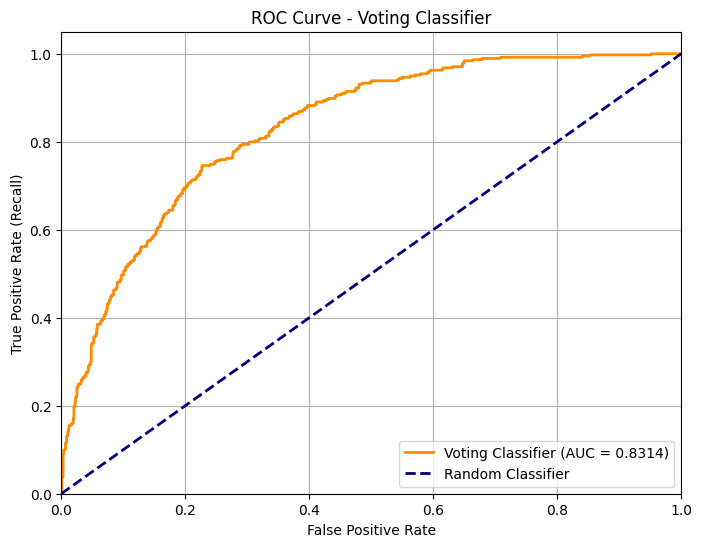

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Voting Classifier (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Voting Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



Stacking Classifier:
Test Accuracy = 0.7456
Precision for class 0: 0.8957, class 1: 0.5144
Recall for class 0: 0.7396, class 1: 0.7620
F1-score for class 0: 0.8102, class 1: 0.6142
AUC-ROC Score: 0.8314
--------------------------------------------------


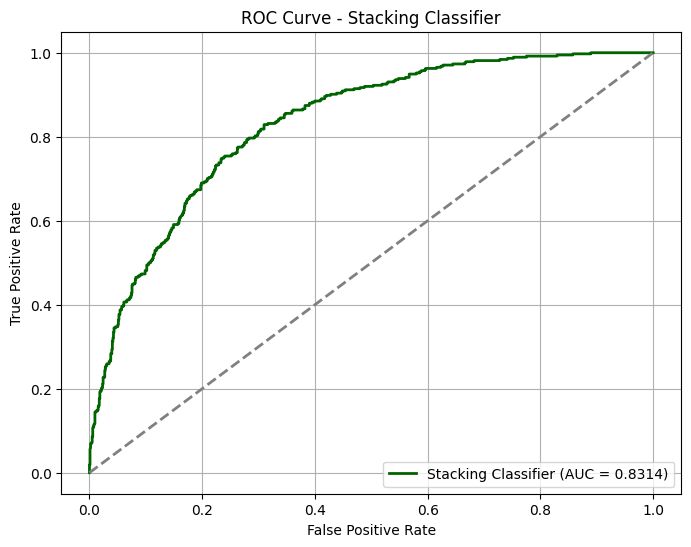

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score
# Base learners
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=200, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(
        n_estimators=50, learning_rate=0.3, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('svm', SVC(
        C=10, kernel='poly', class_weight='balanced', probability=True, random_state=42))
]

# Meta learner
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=-1
)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Train the stacking model
stacking_clf.fit(X_train, y_train)

# Predict
y_pred = stacking_clf.predict(X_test)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)
auc_roc = roc_auc_score(y_test, y_proba)

# Print results
print("\nStacking Classifier:")
print(f"Test Accuracy = {accuracy:.4f}")
print(f"Precision for class 0: {precision[0]:.4f}, class 1: {precision[1]:.4f}")
print(f"Recall for class 0: {recall[0]:.4f}, class 1: {recall[1]:.4f}")
print(f"F1-score for class 0: {f1[0]:.4f}, class 1: {f1[1]:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print("-" * 50)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkgreen', lw=2, label=f'Stacking Classifier (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save the soft voting model
joblib.dump(voting_clf, 'soft_voting_ensemble_model.pkl')
print("Soft voting model saved successfully as 'soft_voting_ensemble_model.pkl'")


Soft voting model saved successfully as 'soft_voting_ensemble_model.pkl'
